In [36]:
import pandas as pd
import numpy as np
import os

# Show current working directory (helps confirm the path)
print("Current working directory:", os.getcwd())

# Load dataset (adjust path if your notebook is inside /notebooks)
df = pd.read_csv("../data/GlobalWeatherRepository.csv")

df.head()

Current working directory: /Users/emilyehrenberg/Documents/Projects/weather-analysis-project/notebooks


,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,...,8.4,26.6,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,66.2,Partly cloudy,...,1.1,2.0,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,73.4,Sunny,...,10.4,18.4,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,43.3,Light drizzle,...,0.7,0.9,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1715849100,2024-05-16 09:45,26.0,78.8,Partly cloudy,...,183.4,262.3,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55


In [37]:
df.info()
df.isna().sum()
df.describe()
df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109718 entries, 0 to 109717
Data columns (total 41 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   country                       109718 non-null  object 
 1   location_name                 109718 non-null  object 
 2   latitude                      109718 non-null  float64
 3   longitude                     109718 non-null  float64
 4   timezone                      109718 non-null  object 
 5   last_updated_epoch            109718 non-null  int64  
 6   last_updated                  109718 non-null  object 
 7   temperature_celsius           109718 non-null  float64
 8   temperature_fahrenheit        109718 non-null  float64
 9   condition_text                109718 non-null  object 
 10  wind_mph                      109718 non-null  float64
 11  wind_kph                      109718 non-null  float64
 12  wind_degree                   109718 non-nul

country                           211
location_name                     254
latitude                          394
longitude                         399
timezone                          197
last_updated_epoch               1084
last_updated                    18911
temperature_celsius               657
temperature_fahrenheit           1083
condition_text                     47
wind_mph                          180
wind_kph                          180
wind_degree                       360
wind_direction                     16
pressure_mb                        89
pressure_in                       207
precip_mm                         621
precip_in                          74
humidity                           99
cloud                             101
feels_like_celsius                772
feels_like_fahrenheit            1311
visibility_km                      70
visibility_miles                   13
uv_index                          163
gust_mph                          501
gust_kph    

In [38]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [39]:
df.isna().any().any()
# returns FALSE, no missing data

np.False_

In [40]:
df.columns

Index(['country', 'location_name', 'latitude', 'longitude', 'timezone',
       'last_updated_epoch', 'last_updated', 'temperature_celsius',
       'temperature_fahrenheit', 'condition_text', 'wind_mph', 'wind_kph',
       'wind_degree', 'wind_direction', 'pressure_mb', 'pressure_in',
       'precip_mm', 'precip_in', 'humidity', 'cloud', 'feels_like_celsius',
       'feels_like_fahrenheit', 'visibility_km', 'visibility_miles',
       'uv_index', 'gust_mph', 'gust_kph', 'air_quality_Carbon_Monoxide',
       'air_quality_Ozone', 'air_quality_Nitrogen_dioxide',
       'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10',
       'air_quality_us-epa-index', 'air_quality_gb-defra-index', 'sunrise',
       'sunset', 'moonrise', 'moonset', 'moon_phase', 'moon_illumination'],
      dtype='object')

In [41]:
df.location_name.head(50)


0                   Kabul
1                  Tirana
2                 Algiers
3        Andorra La Vella
4                  Luanda
5            Saint John's
6            Buenos Aires
7                 Yerevan
8                Canberra
9                  Vienna
10                   Baku
11                 Nassau
12                 Manama
13                  Dhaka
14             Bridgetown
15                  Minsk
16               Brussels
17               Belmopan
18             Porto-Novo
19                Thimphu
20                  Sucre
21               Sarajevo
22               Gaborone
23                   Bras
24    Bandar Seri Begawan
25                  Sofia
26            Ouagadougou
27              Bujumbura
28                  Ivory
29                  Praia
30             Phnom Penh
31                Yaounde
32                 Ottawa
33                 Bangui
34              N'djamena
35               Santiago
36                Beijing
37                  Bogot
38          

In [42]:
"Manila" in df["location_name"].values

True

<Axes: xlabel='last_updated'>

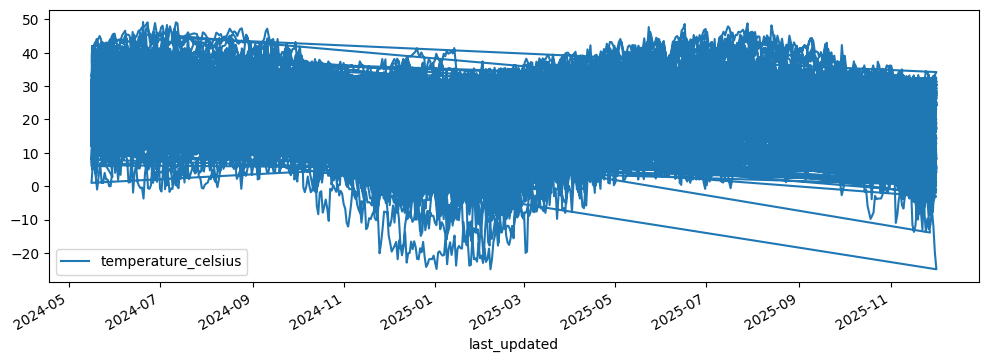

In [43]:
# Convert timestamps and keep a location-aware sort before any shifting
df["last_updated"] = pd.to_datetime(df["last_updated"])
df = df.sort_values(["location_name", "last_updated"]).reset_index(drop=True)

# Quick visualization of the combined temperature series
df.plot(x="last_updated", y="temperature_celsius", figsize=(12, 4))

In [44]:
# Infer sampling cadence per location and create 1-day-ahead targets
dt_minutes = (
    df.groupby("location_name")["last_updated"]
      .diff()
      .dt.total_seconds()
      .div(60)
)

step_minutes = dt_minutes.dropna().median()
if pd.isna(step_minutes) or step_minutes == 0:
    step_minutes = 60.0  # fallback assumption if diffs cannot be inferred

steps_per_day = max(1, int(round(1440 / step_minutes)))

print(f"Estimated step_minutes: {step_minutes:.2f}")
print("Estimated steps_per_day:", steps_per_day)

df["temp_tomorrow"] = (
    df.groupby("location_name")["temperature_celsius"]
      .shift(-steps_per_day)
)

df["temp_delta_1d"] = df["temp_tomorrow"] - df["temperature_celsius"]

df = df.dropna(subset=["temp_tomorrow", "temp_delta_1d"]).reset_index(drop=True)

Estimated step_minutes: 1440.00
Estimated steps_per_day: 1


<Axes: >

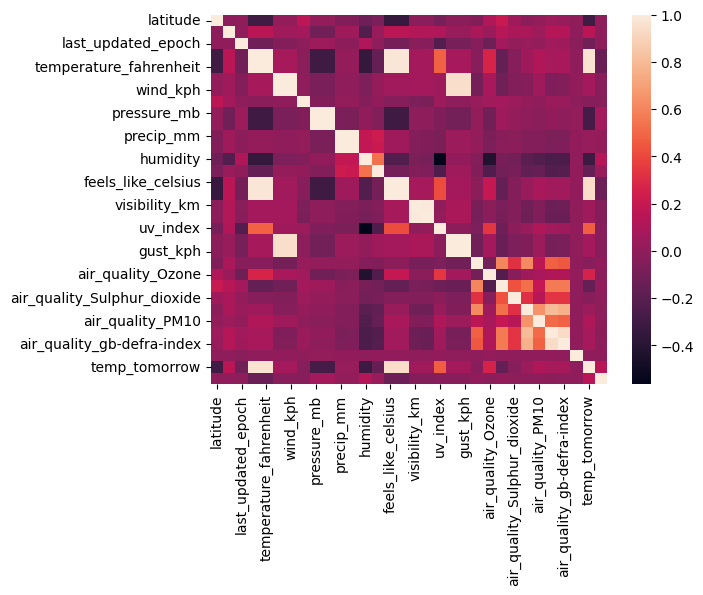

In [45]:
# Show correlation between features
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.corr(numeric_only=True))

In [49]:
# # Features to use:
# temperature_celsius
# humidity
# pressure_mb
# wind_mph
# cloud
# visibility_km
# uv_index
# air_quality_PM2.5
# air_quality_PM10
# air_quality_Ozone

In [50]:
# Feature engineering with per-location lags and rolling stats
base_features = [
    "temperature_celsius",
    "humidity",
    "pressure_mb",
    "wind_mph",
    "cloud",
    "visibility_km",
    "uv_index",
    "air_quality_PM2.5",
    "air_quality_PM10",
    "air_quality_Ozone",
]

temp_by_location = df.groupby("location_name")["temperature_celsius"]

df["temp_lag_1"] = temp_by_location.shift(1)
df["temp_lag_3"] = temp_by_location.shift(3)
df["temp_lag_1d"] = temp_by_location.shift(steps_per_day)

df["rolling_mean_3"] = temp_by_location.transform(
    lambda s: s.shift(1).rolling(window=3, min_periods=3).mean()
)
df["rolling_std_3"] = temp_by_location.transform(
    lambda s: s.shift(1).rolling(window=3, min_periods=3).std()
)

lag_features = [
    "temp_lag_1",
    "temp_lag_3",
    "temp_lag_1d",
    "rolling_mean_3",
    "rolling_std_3",
]

df = df.dropna(subset=lag_features).reset_index(drop=True)

features = base_features + lag_features

X = df[features]
y = df["temp_delta_1d"]

In [51]:
# Time-based train/test split (no shuffling)
split_idx = int(len(df) * 0.8)

X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

test_indices = X_test.index
print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")

Training samples: 86510
Testing samples: 21628


In [52]:
# Inspect the temporal coverage of each split
train_start = df.loc[X_train.index, "last_updated"].min()
train_end = df.loc[X_train.index, "last_updated"].max()
test_start = df.loc[X_test.index, "last_updated"].min()
test_end = df.loc[X_test.index, "last_updated"].max()

print(f"Train period: {train_start} -> {train_end}")
print(f"Test period: {test_start} -> {test_end}")

Train period: 2024-05-21 08:45:00 -> 2025-11-30 20:00:00
Test period: 2024-05-21 07:45:00 -> 2025-11-30 19:45:00


In [53]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

lr_delta_preds = lr.predict(X_test)

In [55]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=12,
    random_state=42
)
rf.fit(X_train, y_train)

rf_delta_preds = rf.predict(X_test)

In [58]:
from xgboost import XGBRegressor

xgb = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb.fit(X_train, y_train)

xgb_delta_preds = xgb.predict(X_test)

In [59]:
from sklearn.metrics import mean_squared_error
import numpy as np

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

current_temp_test = df.loc[X_test.index, "temperature_celsius"].values
temp_true = df.loc[X_test.index, "temp_tomorrow"].values

lr_temp_preds = current_temp_test + lr_delta_preds
rf_temp_preds = current_temp_test + rf_delta_preds
xgb_temp_preds = current_temp_test + xgb_delta_preds

temp_results = {
    "Linear Regression": rmse(temp_true, lr_temp_preds),
    "Random Forest": rmse(temp_true, rf_temp_preds),
    "XGBoost": rmse(temp_true, xgb_temp_preds)
}

temp_results

{'Linear Regression': np.float64(2.5927901928343253),
 'Random Forest': np.float64(2.5173087961522578),
 'XGBoost': np.float64(2.4772147393482786)}

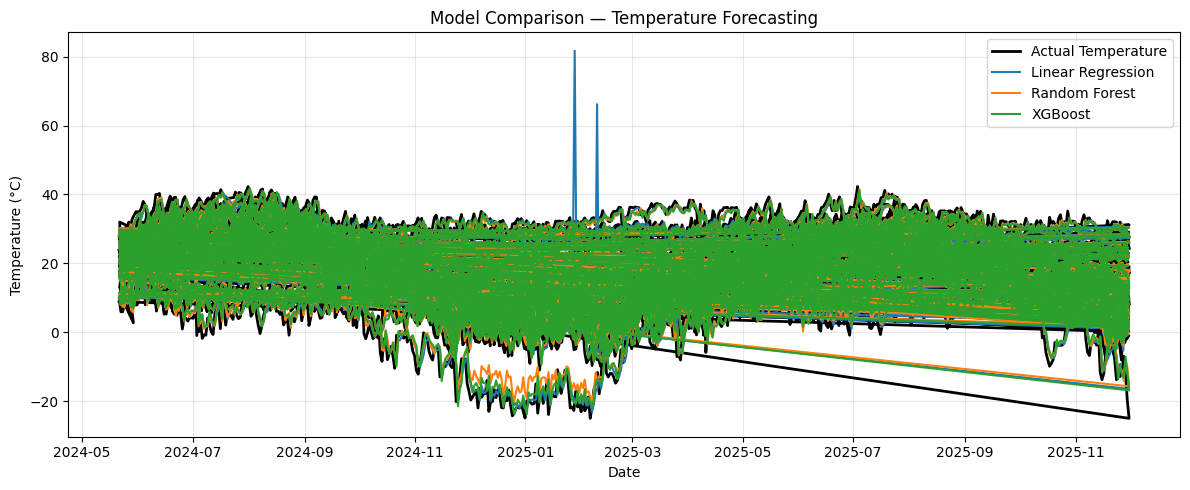

In [60]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

test_dates = df.loc[X_test.index, "last_updated"]
plt.plot(test_dates, temp_true, label="Actual Temperature", color="black", linewidth=2)
plt.plot(test_dates, lr_temp_preds, label="Linear Regression")
plt.plot(test_dates, rf_temp_preds, label="Random Forest")
plt.plot(test_dates, xgb_temp_preds, label="XGBoost")

plt.title("Model Comparison — Temperature Forecasting")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [62]:

# Final summary of modeling artifacts
summary_df = df.loc[X_test.index, [
    "last_updated",
    "location_name",
    "temperature_celsius",
    "temp_tomorrow"
]].copy()
summary_df["pred_temp_xgb"] = xgb_temp_preds

print("df.shape:", df.shape)
print("Features used:", features)
print("Final RMSE (°C)")
for name, score in temp_results.items():
    print(f"  {name}: {score:.3f}")

print("\nFirst 5 XGBoost forecasts:")
print(summary_df.head().to_string(index=False))


df.shape: (108138, 48)
Features used: ['temperature_celsius', 'humidity', 'pressure_mb', 'wind_mph', 'cloud', 'visibility_km', 'uv_index', 'air_quality_PM2.5', 'air_quality_PM10', 'air_quality_Ozone', 'temp_lag_1', 'temp_lag_3', 'temp_lag_1d', 'rolling_mean_3', 'rolling_std_3']
Final RMSE (°C)
  Linear Regression: 2.593
  Random Forest: 2.517
  XGBoost: 2.477

First 5 XGBoost forecasts:
       last_updated location_name  temperature_celsius  temp_tomorrow  pred_temp_xgb
2025-07-10 02:45:00   San Ignacio                 21.4           20.3      21.070820
2025-07-11 02:30:00   San Ignacio                 20.3           23.2      20.631924
2025-07-12 02:30:00   San Ignacio                 23.2           19.3      22.509025
2025-07-13 02:45:00   San Ignacio                 19.3           23.3      20.093292
2025-07-14 03:00:00   San Ignacio                 23.3           23.2      22.680479
